In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline 

import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('df_hdi_complete.csv')

In [3]:
df_country = pd.read_excel('dados_hdi.xlsx')
df_country = df_country[['Country']]

In [4]:
df = df.drop(['RHDI','Continent'], axis=1)
min_max_scaler = MinMaxScaler()
df[['HDI', 'LE', 'EYS', 'MYS', 'GNI', 'GDIV', 'GIIV', 'IHDI', 'ILE', 'IE',
       'II', 'SSP', 'TP', 'TUP', 'MA', 'CHE', 'GEE', 'PPP', 'HB', 'VE', 'RPAE',
       'WAFI', 'CDEP', 'CDE', 'FA', 'FAC', 'DMC', 'RLI', 'SLF', 'RDE']] = min_max_scaler.fit_transform(df[['HDI', 'LE', 'EYS', 'MYS', 'GNI', 'GDIV', 'GIIV', 'IHDI', 'ILE', 'IE',
       'II', 'SSP', 'TP', 'TUP', 'MA', 'CHE', 'GEE', 'PPP', 'HB', 'VE', 'RPAE',
       'WAFI', 'CDEP', 'CDE', 'FA', 'FAC', 'DMC', 'RLI', 'SLF', 'RDE']])

In [5]:
###############
### Economy ###
###############

### Defining the Economy data frame ###
df_economy = df[['HDI', 'LE', 'EYS', 'MYS', 'GNI']]

### Fiting the model ###
kmeanModel = KMeans(n_clusters=3, random_state = 42)
kmeanModel.fit(df_economy)

centroids = kmeanModel.cluster_centers_
labels = kmeanModel.labels_

#print(centroids)
#print(labels)

df_economy['Economy'] = pd.DataFrame(labels)

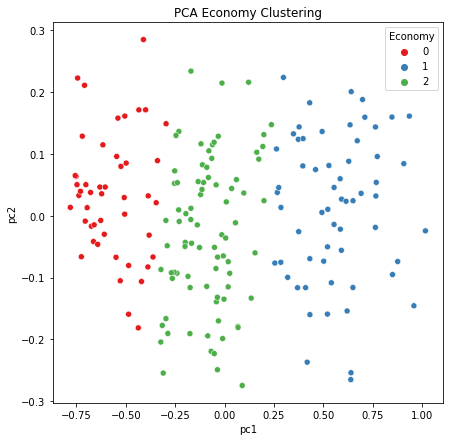

In [6]:
#### PCA for Economy Clustering ###

pca = PCA(n_components = 2)
data_reduced_economy = df_economy.drop(['Economy'],axis=1)
data_reduced_economy = pca.fit_transform(data_reduced_economy)
pca.explained_variance_ratio_

data_reduced_df_economy = pd.DataFrame(data_reduced_economy)
data_reduced_df_economy.columns = ['pc1','pc2']
pca_clustering_economy = pd.concat([data_reduced_df_economy,df_economy['Economy']],axis=1)

### Ploting the PCA for Economy ###

plt.figure(figsize=(7,7))
sns.scatterplot(x='pc1', y='pc2', hue= 'Economy', data=pca_clustering_economy,palette='Set1').set_title('PCA Economy Clustering')
plt.show()

In [7]:
##################
### Inequality ###
##################
df_inequality = df[['IHDI','ILE','IE','II','VE','RPAE','SLF']]

### Fiting the model ###
kmeanModel = KMeans(n_clusters=3, random_state = 42)
kmeanModel.fit(df_inequality)

centroids = kmeanModel.cluster_centers_
labels = kmeanModel.labels_

#print(centroids)
#print(labels)

df_inequality['Inequality'] = pd.DataFrame(labels)

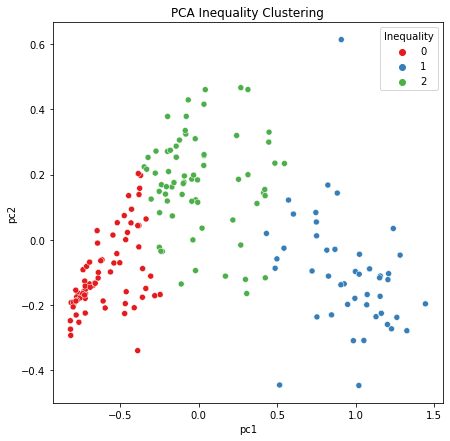

In [8]:
#### PCA for Inequality Clustering ###

pca = PCA(n_components = 2)
data_reduced_inequality = df_inequality.drop(['Inequality'],axis=1)
data_reduced_inequality = pca.fit_transform(data_reduced_inequality)
pca.explained_variance_ratio_

data_reduced_df_inequality = pd.DataFrame(data_reduced_inequality)
data_reduced_df_inequality.columns = ['pc1','pc2']
pca_clustering_inequality = pd.concat([data_reduced_df_inequality,df_inequality['Inequality']],axis=1)

### Ploting the PCA for inequality ###

plt.figure(figsize=(7,7))
sns.scatterplot(x='pc1', y='pc2', hue= 'Inequality', data=pca_clustering_inequality,palette='Set1').set_title('PCA Inequality Clustering')
plt.show()

In [9]:
##############
### Gender ###
##############
df_gender = df[['GDIV', 'GIIV','SSP', 'WAFI']]

### Fiting the model ###
kmeanModel = KMeans(n_clusters=4, random_state = 42)
kmeanModel.fit(df_gender)

centroids = kmeanModel.cluster_centers_
labels = kmeanModel.labels_

#print(centroids)
#print(labels)

df_gender['Gender'] = pd.DataFrame(labels)

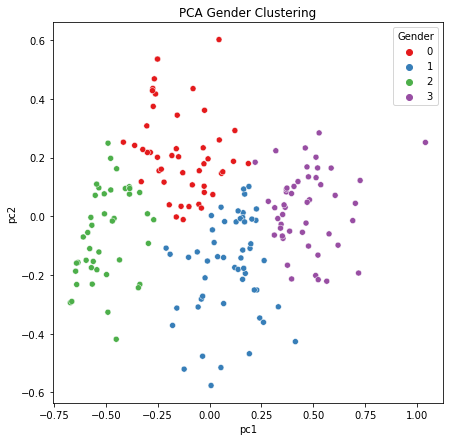

In [10]:
#### PCA for Gender Clustering ###

pca = PCA(n_components = 2)
data_reduced_gender = df_gender.drop(['Gender'],axis=1)
data_reduced_gender = pca.fit_transform(data_reduced_gender)
pca.explained_variance_ratio_

data_reduced_df_gender = pd.DataFrame(data_reduced_gender)
data_reduced_df_gender.columns = ['pc1','pc2']
pca_clustering_gender = pd.concat([data_reduced_df_gender,df_gender['Gender']],axis=1)

### Ploting the PCA for gender ###

plt.figure(figsize=(7,7))
sns.scatterplot(x='pc1', y='pc2', hue= 'Gender', data=pca_clustering_gender,palette='Set1').set_title('PCA Gender Clustering')
plt.show()

In [11]:
######################
### Population/Age ###
######################
df_population = df[['TP', 'TUP', 'MA']]

### Fiting the model ###
kmeanModel = KMeans(n_clusters=4, random_state = 42)
kmeanModel.fit(df_population)

centroids = kmeanModel.cluster_centers_
labels = kmeanModel.labels_

#print(centroids)
#print(labels)

df_population['Population'] = pd.DataFrame(labels)

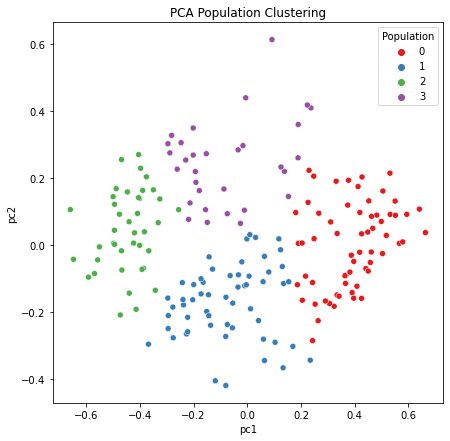

In [12]:
#### PCA for population Clustering ###

pca = PCA(n_components = 2)
data_reduced_population = df_population.drop(['Population'],axis=1)
data_reduced_population = pca.fit_transform(data_reduced_population)
pca.explained_variance_ratio_

data_reduced_df_population = pd.DataFrame(data_reduced_population)
data_reduced_df_population.columns = ['pc1','pc2']
pca_clustering_population = pd.concat([data_reduced_df_population,df_population['Population']],axis=1)

### Ploting the PCA for population ###

plt.figure(figsize=(7,7))
sns.scatterplot(x='pc1', y='pc2', hue= 'Population', data=pca_clustering_population,palette='Set1').set_title('PCA Population Clustering')
plt.show()

In [13]:
#############################################
### Health/Education/Research Expenditure ###
#############################################
df_expenditure = df[['CHE','GEE','RDE']]

### Fiting the model ###
kmeanModel = KMeans(n_clusters=4, random_state = 42)
kmeanModel.fit(df_expenditure)

centroids = kmeanModel.cluster_centers_
labels = kmeanModel.labels_

#print(centroids)
#print(labels)

df_expenditure['Expenditure'] = pd.DataFrame(labels)

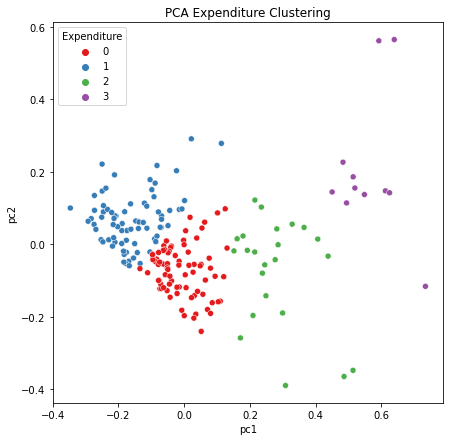

In [14]:
#### PCA for expenditure Clustering ###

pca = PCA(n_components = 2)
data_reduced_expenditure = df_expenditure.drop(['Expenditure'],axis=1)
data_reduced_expenditure = pca.fit_transform(data_reduced_expenditure)
pca.explained_variance_ratio_

data_reduced_df_expenditure = pd.DataFrame(data_reduced_expenditure)
data_reduced_df_expenditure.columns = ['pc1','pc2']
pca_clustering_expenditure = pd.concat([data_reduced_df_expenditure,df_expenditure['Expenditure']],axis=1)

### Ploting the PCA for expenditure ###

plt.figure(figsize=(7,7))
sns.scatterplot(x='pc1', y='pc2', hue= 'Expenditure', data=pca_clustering_expenditure,palette='Set1').set_title('PCA Expenditure Clustering')
plt.show()

In [15]:
####################
### Health Acess ###
####################
df_health = df[['PPP','HB']]

### Fiting the model ###
kmeanModel = KMeans(n_clusters=4, random_state = 42)
kmeanModel.fit(df_health)

centroids = kmeanModel.cluster_centers_
labels = kmeanModel.labels_

#print(centroids)
#print(labels)

df_health['Health'] = pd.DataFrame(labels)

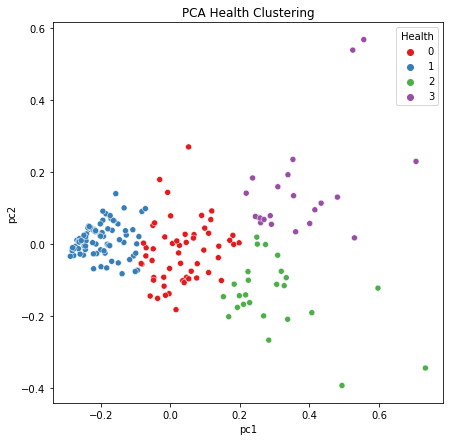

In [16]:
#### PCA for health Clustering ###

pca = PCA(n_components = 2)
data_reduced_health = df_health.drop(['Health'],axis=1)
data_reduced_health = pca.fit_transform(data_reduced_health)
pca.explained_variance_ratio_

data_reduced_df_health = pd.DataFrame(data_reduced_health)
data_reduced_df_health.columns = ['pc1','pc2']
pca_clustering_health = pd.concat([data_reduced_df_health,df_health['Health']],axis=1)

### Ploting the PCA for health ###

plt.figure(figsize=(7,7))
sns.scatterplot(x='pc1', y='pc2', hue= 'Health', data=pca_clustering_health,palette='Set1').set_title('PCA Health Clustering')
plt.show()

In [17]:
####################
### Environment ###
###################
df_environment = df[['CDEP', 'CDE', 'FA', 'FAC', 'DMC', 'RLI']]

### Fiting the model and ploting an example ###
kmeanModel = KMeans(n_clusters=4, random_state = 42)
kmeanModel.fit(df_environment)

centroids = kmeanModel.cluster_centers_
labels = kmeanModel.labels_

#print(centroids)
#print(labels)

df_environment['Environment'] = pd.DataFrame(labels)

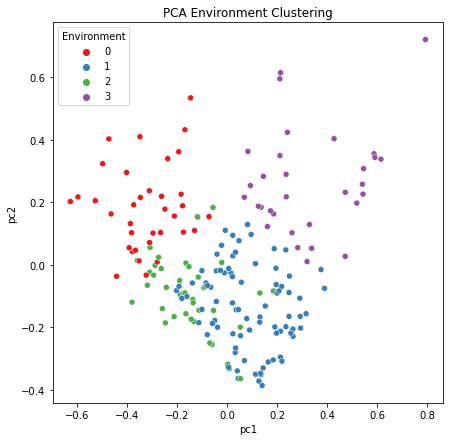

In [18]:
#### PCA for environment Clustering ###

pca = PCA(n_components = 2)
data_reduced_environment = df_environment.drop(['Environment'],axis=1)
data_reduced_environment = pca.fit_transform(data_reduced_environment)
pca.explained_variance_ratio_

data_reduced_df_environment = pd.DataFrame(data_reduced_environment)
data_reduced_df_environment.columns = ['pc1','pc2']
pca_clustering_environment = pd.concat([data_reduced_df_environment,df_environment['Environment']],axis=1)

### Ploting the PCA for Environment ###

plt.figure(figsize=(7,7))
sns.scatterplot(x='pc1', y='pc2', hue= 'Environment', data=pca_clustering_environment,palette='Set1').set_title('PCA Environment Clustering')
plt.show()

In [19]:
############################
### Final Results so far ###
############################
df_full_hdi = pd.concat([df_country,df_economy['Economy'],df_inequality['Inequality'],df_gender['Gender'],df_population['Population'],df_expenditure['Expenditure'],df_health['Health'],df_environment['Environment']], axis=1)

df_full_hdi.set_index('Country',inplace=True)
df_full_hdi.head()

,Economy,Inequality,Gender,Population,Expenditure,Health,Environment
Country,,,,,,,
Norway,0,0,2,2,2,0,1
Ireland,0,0,2,3,0,0,1
Switzerland,0,0,2,2,3,2,1
"Hong Kong, China (SAR)",0,0,0,2,1,0,1
Iceland,0,0,2,2,2,2,1


In [20]:
#df_full_hdi.loc['Brazil'][:]

In [21]:
#list(df_full_hdi[df_full_hdi['Economy']==2].index.values)

In [22]:
#list(df_full_hdi[df_full_hdi['Inequality']==2].index.values)

In [23]:
#list(df_full_hdi[df_full_hdi['Gender']==0].index.values)

In [29]:
#list(df_full_hdi[df_full_hdi['Population']==1].index.values)

In [25]:
#list(df_full_hdi[df_full_hdi['Expenditure']==2].index.values)

In [26]:
#list(df_full_hdi[df_full_hdi['Health']==0].index.values)

In [28]:
#list(df_full_hdi[df_full_hdi['Environment']==0].index.values)